In [ ]:
import os
import skimage.io as io
import skimage.transform as trans
import shutil
import cv2
import matplotlib.pyplot as plt
import pickle
import time
from __future__ import print_function
import glob
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.models import load_model as load_initial_model
#import tensorflow_io as tfio
from google.colab.patches import cv2_imshow
import gc
#from pylibtiff import TIFF
from PIL import Image

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm
from PIL import Image
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.losses import binary_crossentropy
from sklearn.utils import shuffle
from glob import glob
import tensorflow as tf
from keras import callbacks,optimizers,metrics
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.optimizers import Adam
from keras.metrics import Recall, Precision, Accuracy

In [ ]:
from albumentations import (HorizontalFlip,VerticalFlip,ElasticTransform,GridDistortion,OpticalDistortion,CoarseDropout,
                            RandomCrop,Emboss,Transpose,Rotate,RandomBrightnessContrast,Normalize,CLAHE,ToGray,RandomGamma,
                            HueSaturationValue,RGBShift,MedianBlur,GaussianBlur,GaussNoise,ChannelShuffle)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Original images

In [ ]:
root = '/content/drive/MyDrive/'
exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm','jpeg')

In [ ]:
input_data0 = os.path.join(root, 'DATA_PREPROCESSING/0')
images_0 = sorted(
    [
        os.path.join(input_data0, fname)
        for fname in os.listdir(input_data0)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data1 = os.path.join(root, 'DATA_PREPROCESSING/1')
images_1 = sorted(
    [
        os.path.join(input_data1, fname)
        for fname in os.listdir(input_data1)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data2 = os.path.join(root, 'DATA_PREPROCESSING/2')
images_2 = sorted(
    [
        os.path.join(input_data2, fname)
        for fname in os.listdir(input_data2)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data3 = os.path.join(root, 'DATA_PREPROCESSING/3')
images_3 = sorted(
    [
        os.path.join(input_data3, fname)
        for fname in os.listdir(input_data3)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data = os.path.join(root, 'DATA_PREPROCESSING/4')
images_4 = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

X = images_0 + images_1 + images_2 + images_3 + images_4

print("Number of samples:", len(X))


Number of samples: 267


### Target images

In [ ]:
# target list

input_data0 = os.path.join(root, 'DATA_PREPROCESSING/A++')
y_0 = sorted(
    [
        os.path.join(input_data0, fname)
        for fname in os.listdir(input_data0)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data1 = os.path.join(root, 'DATA_PREPROCESSING/B++')
y_1 = sorted(
    [
        os.path.join(input_data1, fname)
        for fname in os.listdir(input_data1)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data2 = os.path.join(root, 'DATA_PREPROCESSING/C++')
y_2 = sorted(
    [
        os.path.join(input_data2, fname)
        for fname in os.listdir(input_data2)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data3 = os.path.join(root, 'DATA_PREPROCESSING/D++')
y_3 = sorted(
    [
        os.path.join(input_data3, fname)
        for fname in os.listdir(input_data3)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)


input_data = os.path.join(root, 'DATA_PREPROCESSING/E++')
y_4 = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

y = y_0 + y_1 + y_2 + y_3 + y_4


print("Number of samples:", len(y))


Number of samples: 267


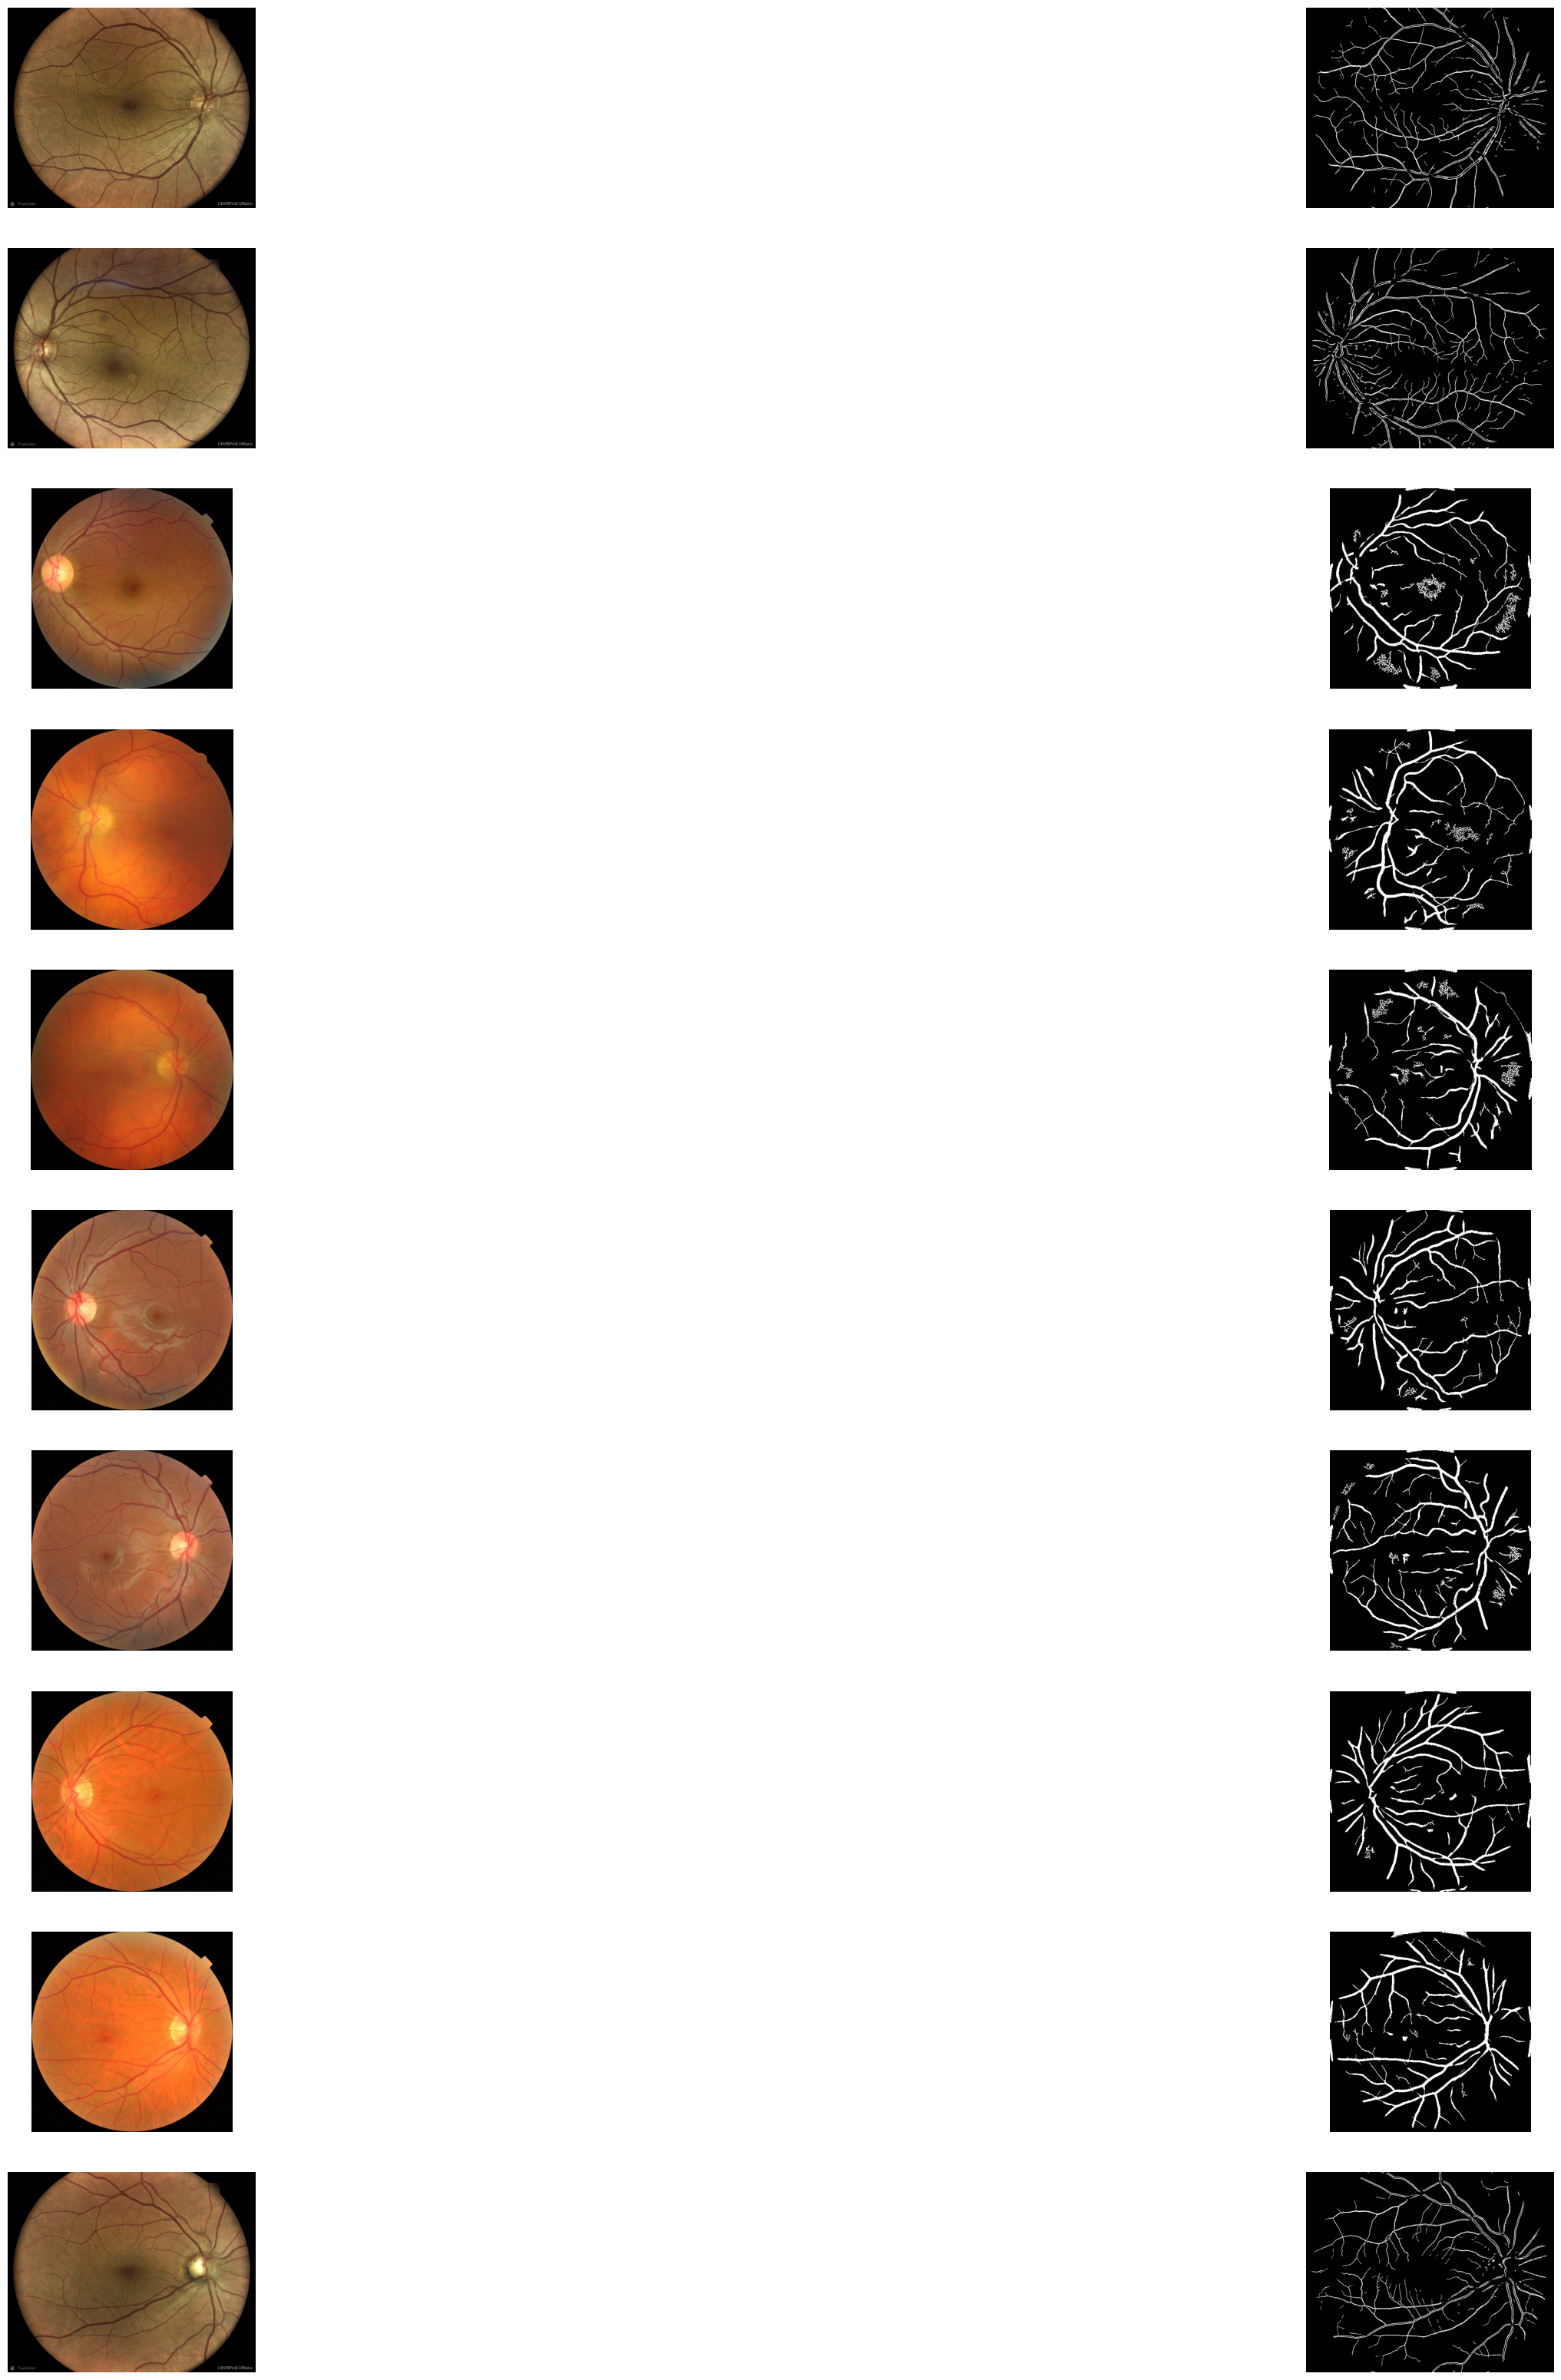

In [ ]:
# Chargement des quatres premières images et masques
images_to_show = X[:10]
masks_to_show = y[:10]

# Création de la figure et des sous-plots
fig, axs = plt.subplots(10, 2, figsize=(40, 40))

# Parcours des images et masques
for i, (image_path, mask_path) in enumerate(zip(images_to_show, masks_to_show)):

    # Chargement et affichage de l'image
    img = Image.open(image_path)
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].axis('off')

    # Chargement et affichage du masque
    mask = Image.open(mask_path)
    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 1].axis('off')

# Affichage de la figure
plt.show()

In [ ]:
print(y[259])
print(X[259])

/content/drive/MyDrive/DATA_PREPROCESSING/E++/_HHH_segmented_e-896_-CHU-k.jpeg
/content/drive/MyDrive/DATA_PREPROCESSING/4/e-896_-CHU-k.jpeg


### DATA SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Divisez les données en ensembles d'entraînement et de test
X_train_paths, X_test_paths, y_train_paths, y_test_paths = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("le nombre de trainset avant augmentation : ", len(X_train_paths) )
print("le nombre de testset avant augmentation : ", len(X_test_paths) )

le nombre de trainset avant augmentation :  213
le nombre de testset avant augmentation :  54


### LOAD images

#### Images sizes

In [ ]:
from collections import Counter

a=[]
for i in range(266):
  a.append(cv2.imread(X[i]).shape)

occurrences = Counter(a)
print(occurrences)

Counter({(2910, 3600, 3): 140, (511, 512, 3): 62, (512, 512, 3): 19, (510, 512, 3): 18, (509, 512, 3): 13, (508, 512, 3): 11, (501, 512, 3): 1, (507, 512, 3): 1, (494, 512, 3): 1})


- On opte pour la taille (256, 256, 3)

In [ ]:
def load_images_X(paths):
    images = []
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (512, 512))  # Redimensionnez l'image si nécessaire
        img_array = np.array(img)
        img_array = img_array.astype('float32') / 255.0
        images.append(img_array)
    return np.array(images)

def load_images_y(paths):
    images = []
    for path in paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (512, 512))  # Redimensionnez l'image si nécessaire
        img_array = np.array(img)
        img_array = img_array.astype('float32') / 255.0
        images.append(img_array)
    return np.array(images)


In [ ]:
# Prétraitement des images
# Chargement des images non segmentées
X_train = load_images_X(X_train_paths)
X_test = load_images_X(X_test_paths)

# Chargement des images segmentées correspondantes
y_train = load_images_y(y_train_paths)
y_test = load_images_y(y_test_paths)


### Augmentation !!

In [ ]:
def augment_data(images, masks, save_path, augment=True):
    H = 256
    W = 256

    for idx, (x, y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
        """ Extracting names """
        name = x.split("/")[-1].split(".")[0]

        """ Reading image and mask """
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        #y = imageio.mimread(y)[0]
        #y = Image.open(y)
        y = cv2.imread(y, cv2.IMREAD_GRAYSCALE)

        if augment == True:

            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]

            aug = VerticalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x2 = augmented["image"]
            y2 = augmented["mask"]

            aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
            augmented = aug(image=x, mask=y)
            x3 = augmented["image"]
            y3 = augmented["mask"]

            aug = GridDistortion(p=1)
            augmented = aug(image=x, mask=y)
            x4 = augmented["image"]
            y4 = augmented["mask"]

            aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
            augmented = aug(image=x, mask=y)
            x5 = augmented["image"]
            y5 = augmented["mask"]

            aug = Emboss(p=1)
            augmented = aug(image=x, mask=y)
            x6 = augmented["image"]
            y6 = augmented["mask"]

            aug = Transpose(p=1.0)
            augmented = aug(image=x, mask=y)
            x7 = augmented["image"]
            y7 = augmented["mask"]

            aug = Rotate(limit= 180, p = 1.0,border_mode=cv2.BORDER_CONSTANT)
            augmented = aug(image=x, mask=y)
            x8 = augmented["image"]
            y8 = augmented["mask"]

            aug = RandomBrightnessContrast(p=1)
            augmented = aug(image=x, mask=y)
            x9 = augmented["image"]
            y9 = augmented["mask"]

            aug = CLAHE(clip_limit=10,tile_grid_size=(15,15),p=1.0)
            augmented = aug(image=x, mask=y)
            x10 = augmented["image"]
            y10 = augmented["mask"]

            aug = ToGray(p=1)
            augmented = aug(image=x, mask=y)
            x11 = augmented["image"]
            y11 = augmented["mask"]

            aug = CLAHE(clip_limit=15,tile_grid_size=(15,15),p=1.0)
            augmented = aug(image=x11, mask=y11)
            x12 = augmented["image"]
            y12 = augmented["mask"]

            aug = MedianBlur(p=1, blur_limit=5)
            augmented = aug(image=x12, mask=y12)
            x13 = augmented['image']
            y13 = augmented['mask']

            aug = GaussianBlur(p=1, blur_limit=3)
            augmented = aug(image=x12, mask=y12)
            x14 = augmented['image']
            y14 = augmented['mask']

            aug = RandomGamma(p=1)
            augmented = aug(image=x13, mask=y13)
            x16 = augmented['image']
            y16 = augmented['mask']

            aug = Normalize(p=1)
            augmented = aug(image=x11, mask=y11)
            x17 = augmented["image"]
            y17 = augmented["mask"]

            aug = HueSaturationValue(p=1)
            augmented = aug(image=x, mask=y)
            x18 = augmented['image']
            y18 = augmented['mask']

            aug = RGBShift(p=1)
            augmented = aug(image=x, mask=y)
            x19 = augmented['image']
            y19 = augmented['mask']

            aug = ChannelShuffle(p=1)
            augmented = aug(image=x, mask=y)
            x15 = augmented['image']
            y15 = augmented['mask']


            X_augmented = [x, x1, x2, x3, x4, x5, x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19]
            Y_augmented = [y, y1, y2, y3, y4, y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19]


        else :
            X_augmented = [x]
            Y_augmented = [y]

        index = 0
        for i, m in zip(X_augmented, Y_augmented):
            i = cv2.resize(i, (W, H))
            m = cv2.resize(m, (W, H))


            if len(X_augmented) == 1:
                tmp_image_name = f"{name}.jpg"
                tmp_mask_name = f"{name}.jpg"
            else:
                tmp_image_name = f"{name}_{index}.jpg"
                tmp_mask_name = f"{name}_{index}.jpg"

            image_path = os.path.join(save_path, "image", tmp_image_name)
            mask_path = os.path.join(save_path, "mask", tmp_mask_name)

            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)

            index += 1

In [ ]:
augment_data(X_train_paths,y_train_paths,"/content/drive/MyDrive/DATA_PREPROCESSING/UNET/train_resized/",augment=True)

100%|██████████| 213/213 [16:33<00:00,  4.66s/it]


In [ ]:
augment_data(X_test_paths,y_test_paths,"/content/drive/MyDrive/DATA_PREPROCESSING/UNET/test/",augment=False)

100%|██████████| 54/54 [00:09<00:00,  5.75it/s]


### la nouvelle taille de training set

In [ ]:
## augmented data


input_data = os.path.join(root, 'DATA_PREPROCESSING/UNET/train/image')
augmented_train = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

#print("Le nombre de donnees de training avant l'operation de l'augmentation : ",len(X_train_paths))
print("Le nombre de donnees de training apres l'operation de l'augmentation : ",len(augmented_train))


input_data = os.path.join(root, 'DATA_PREPROCESSING/UNET/test/image')
augmented_test = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

#print("Le nombre de donnees de testing avant l'operation de l'augmentation : ",len(X_test_paths))
print("Le nombre de donnees de testing apres l'operation de l'augmentation : ",len(augmented_test))

Le nombre de donnees de training apres l'operation de l'augmentation :  4260
Le nombre de donnees de testing apres l'operation de l'augmentation :  54
